In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.shape

(16598, 11)

In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
df.isnull().sum()

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.016327
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [12]:
df.isna().sum().sort_values(ascending = False)/len(df)

Year            0.016327
Publisher       0.003494
Global_Sales    0.000000
Other_Sales     0.000000
JP_Sales        0.000000
EU_Sales        0.000000
NA_Sales        0.000000
Genre           0.000000
Platform        0.000000
Name            0.000000
Rank            0.000000
dtype: float64

In [15]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [17]:
len(df[df.duplicated()])

0

# 1. What genre games have been made the most?

In [38]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [39]:
# alternative solution
df.groupby(['Genre']).count().sort_values('Rank',ascending=False)['Rank']

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Rank, dtype: int64

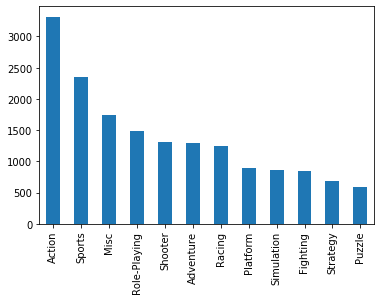

In [40]:
df['Genre'].value_counts().plot(kind='bar')

# 2. Which year had the most game release?

In [52]:
df['Year'].value_counts().head(10)

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
Name: Year, dtype: int64

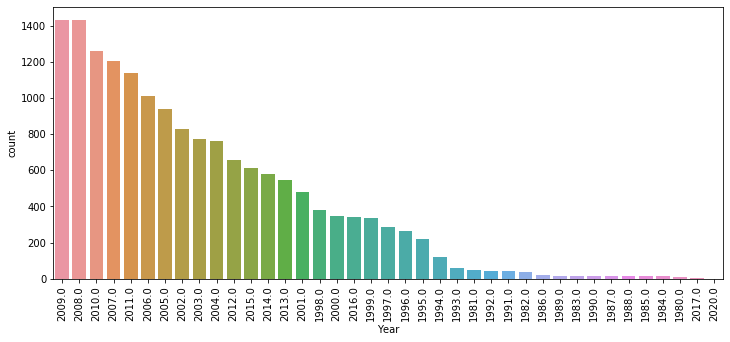

In [54]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Year',order=df['Year'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

# 3. Which year had the highest sales worldwide?

In [82]:
df.groupby('Year').sum().sort_values('Global_Sales',ascending=False).head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,
2008.0,12088007,351.44,184.40,60.26,82.39,678.90
2009.0,12420219,338.85,191.59,61.89,74.77,667.30
2007.0,10344609,312.05,160.50,60.29,77.60,611.13
2010.0,11059005,304.24,176.73,59.49,59.90,600.45
2006.0,9563593,263.12,129.24,73.73,54.43,521.04


# 4. Which genre game has been released the most in a single year?

In [110]:
df.groupby(['Genre','Year']).count().sort_values('Rank',ascending=False).head(10)


Rank  Name  Platform  Publisher  NA_Sales  EU_Sales  JP_Sales  \
Genre  Year                                                                    
Action 2009.0   272   272       272        272       272       272       272   
       2012.0   266   266       266        265       266       266       266   
       2015.0   255   255       255        255       255       255       255   
       2011.0   239   239       239        239       239       239       239   
       2010.0   226   226       226        226       226       226       226   
       2008.0   221   221       221        221       221       221       221   
Misc   2008.0   212   212       212        212       212       212       212   
Action 2007.0   211   211       211        211       211       211       211   
Misc   2009.0   207   207       207        207       207       207       207   
       2010.0   201   201       201        201       201       201       201   

               Other_Sales  Global_Sales  
Genre  Year                               
Action 2009.0          272           272  
       2012.0          266           266  
       2015.0          255           255  
       2011.0          239           239  
       2010.0          226           226  
       2008.0          221           221  
Misc   2008.0          212           212  
Action 2007.0          211           211  
Misc   2009.0          207           207  
       2010.0          201           201

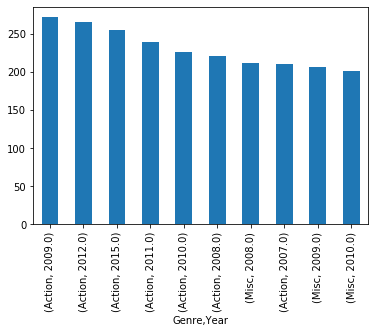

In [104]:
df.groupby(['Genre','Year']).count().sort_values('Global_Sales',ascending=False)['Global_Sales'].head(10).plot(kind='bar')

# 5. Which genre game has sold the most in a single year?

In [113]:
df.groupby(['Genre','Year']).sum().sort_values('Global_Sales',ascending=False)

,,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,Year,,,,,,
Action,2009.0,2081261,71.61,39.20,11.96,16.67,139.36
Sports,2009.0,1400859,71.47,42.17,9.81,15.14,138.52
Action,2008.0,1610396,72.39,39.49,6.00,18.55,136.39
Sports,2006.0,1151497,72.91,40.20,8.69,14.32,136.16
Action,2013.0,1109878,53.79,45.21,10.88,15.33,125.22
...,...,...,...,...,...,...,...
Adventure,1993.0,11953,0.00,0.00,0.07,0.00,0.07
Role-Playing,2017.0,30637,0.00,0.00,0.04,0.00,0.04
Simulation,1985.0,14338,0.00,0.03,0.00,0.01,0.03


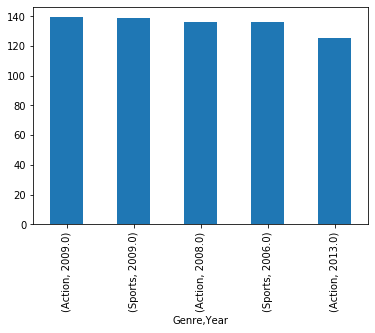

In [116]:
df.groupby(['Genre','Year']).sum().sort_values('Global_Sales',ascending=False)['Global_Sales'].head().plot(kind='bar')
plt.show()

# 6. Which genre game have the highest sale price globally

In [118]:
df.groupby('Genre').sum().sort_values('Global_Sales',ascending=False)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,26441383,6531731.0,877.83,525.00,159.95,187.38,1751.18
Sports,17419112,4620621.0,683.35,376.85,135.37,134.97,1330.93
Shooter,9653872,2571588.0,582.60,313.27,38.28,102.69,1037.37
Role-Playing,12032228,2952379.0,327.28,188.06,352.31,59.61,927.37
Platform,6137545,1755347.0,447.05,201.63,130.77,51.59,831.37
Misc,14889052,3432412.0,410.24,215.98,107.76,75.32,809.96
Racing,9943933,2457934.0,359.42,238.39,56.69,77.27,732.04
Fighting,6484242,1675871.0,223.59,101.32,87.35,36.68,448.91
Simulation,7478816,1707589.0,183.31,113.38,63.70,31.52,392.20


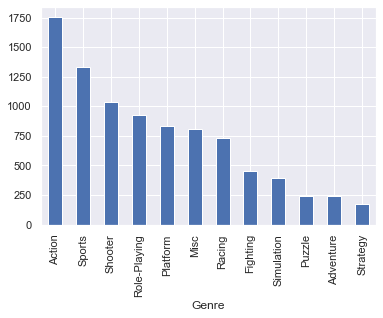

In [184]:
df.groupby('Genre').sum().sort_values('Global_Sales',ascending=False)['Global_Sales'].plot(kind='bar')

In [134]:
top_genres = df.groupby(by=['Genre'])['Global_Sales'].sum()
top_genres = top_genres.reset_index()
top_genres = top_genres.sort_values('Global_Sales',ascending=False)

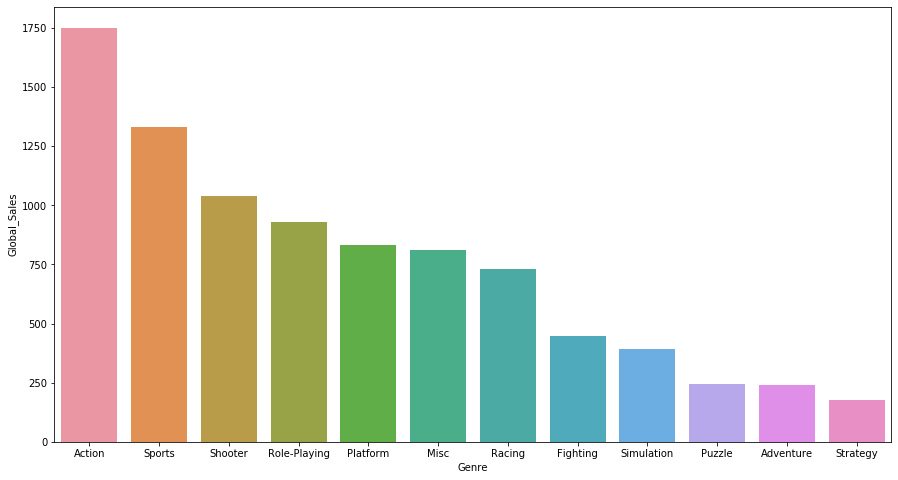

In [135]:
plt.figure(figsize=(15, 8))
sns.barplot(data=top_genres,x='Genre',y='Global_Sales')
plt.show()

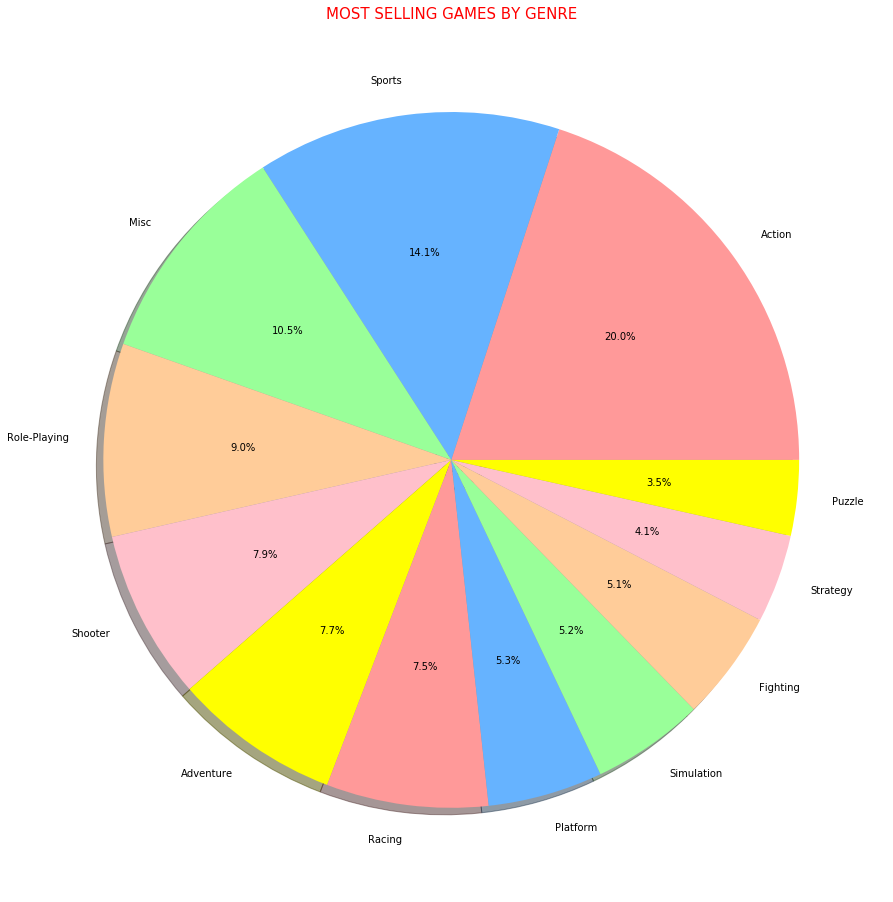

In [133]:
labels = df["Genre"].value_counts().index
sizes = df["Genre"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (16,16))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.title('MOST SELLING GAMES BY GENRE',color = 'red',fontsize = 15)

plt.show()      


# 7. Which platfrom have the highest sale price globally?

In [139]:
platforms = df.groupby('Platform')['Global_Sales'].sum()
platforms = platforms.reset_index()
platforms = platforms.sort_values('Global_Sales',ascending=False)

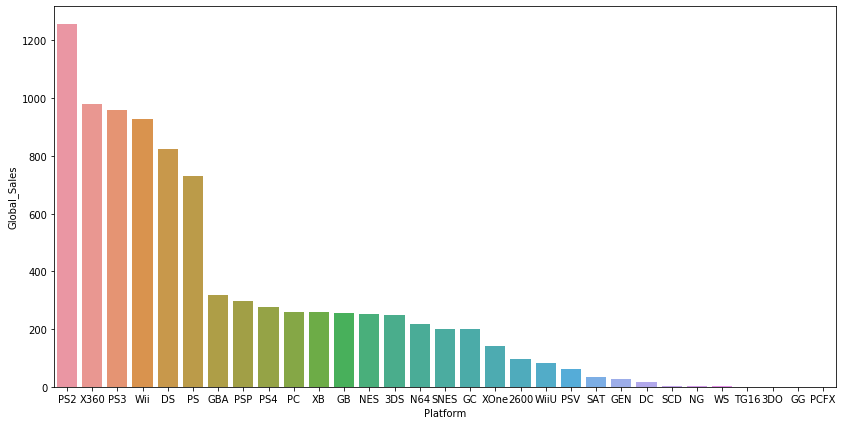

In [141]:
plt.figure(figsize=(14,7))
sns.barplot(data=platforms,x='Platform',y='Global_Sales')
plt.show()

# 8. Which individual game have the highest sale price globally?

In [150]:
df[['Name','Global_Sales']].sort_values('Global_Sales',ascending=False).head()

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37


In [154]:
top_game = df.sort_values('Global_Sales',ascending=False).head()

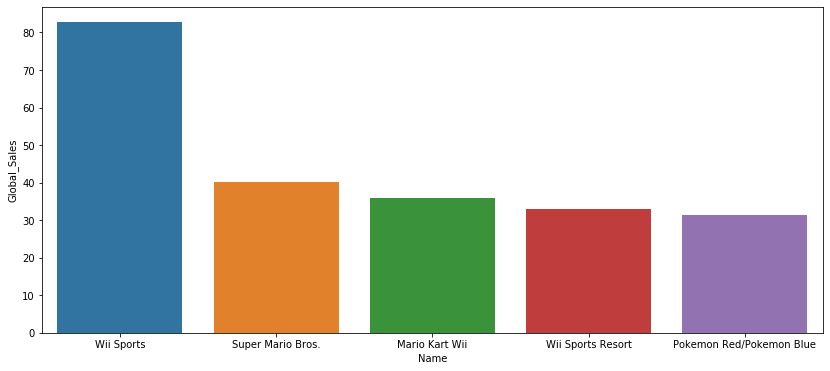

In [156]:
plt.figure(figsize=(14,6))
sns.barplot(data=top_game,x='Name',y='Global_Sales')
plt.show()

# 9. Sales comparison by genre

In [158]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


In [159]:
sales_comparison = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]


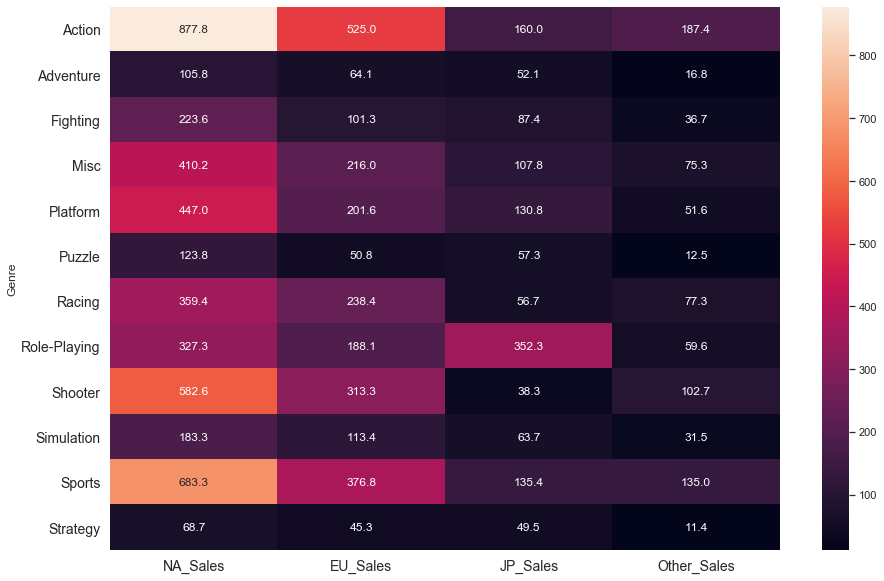

In [161]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(sales_comparison.groupby("Genre").sum(), annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


# 10. Sales comparison by platform

In [186]:
comp_platforms = df[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

In [189]:
comp_platforms = comp_platforms.groupby('Platform').sum().reset_index()
comp_platforms.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2600,90.60,5.47,0.00,0.91
1,3DO,0.00,0.00,0.10,0.00
2,3DS,78.87,58.52,97.35,12.63
3,DC,5.43,1.69,8.56,0.27
4,DS,390.71,194.65,175.57,60.53


In [191]:
comp_table = pd.melt(comp_platforms, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')

comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.87
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.71


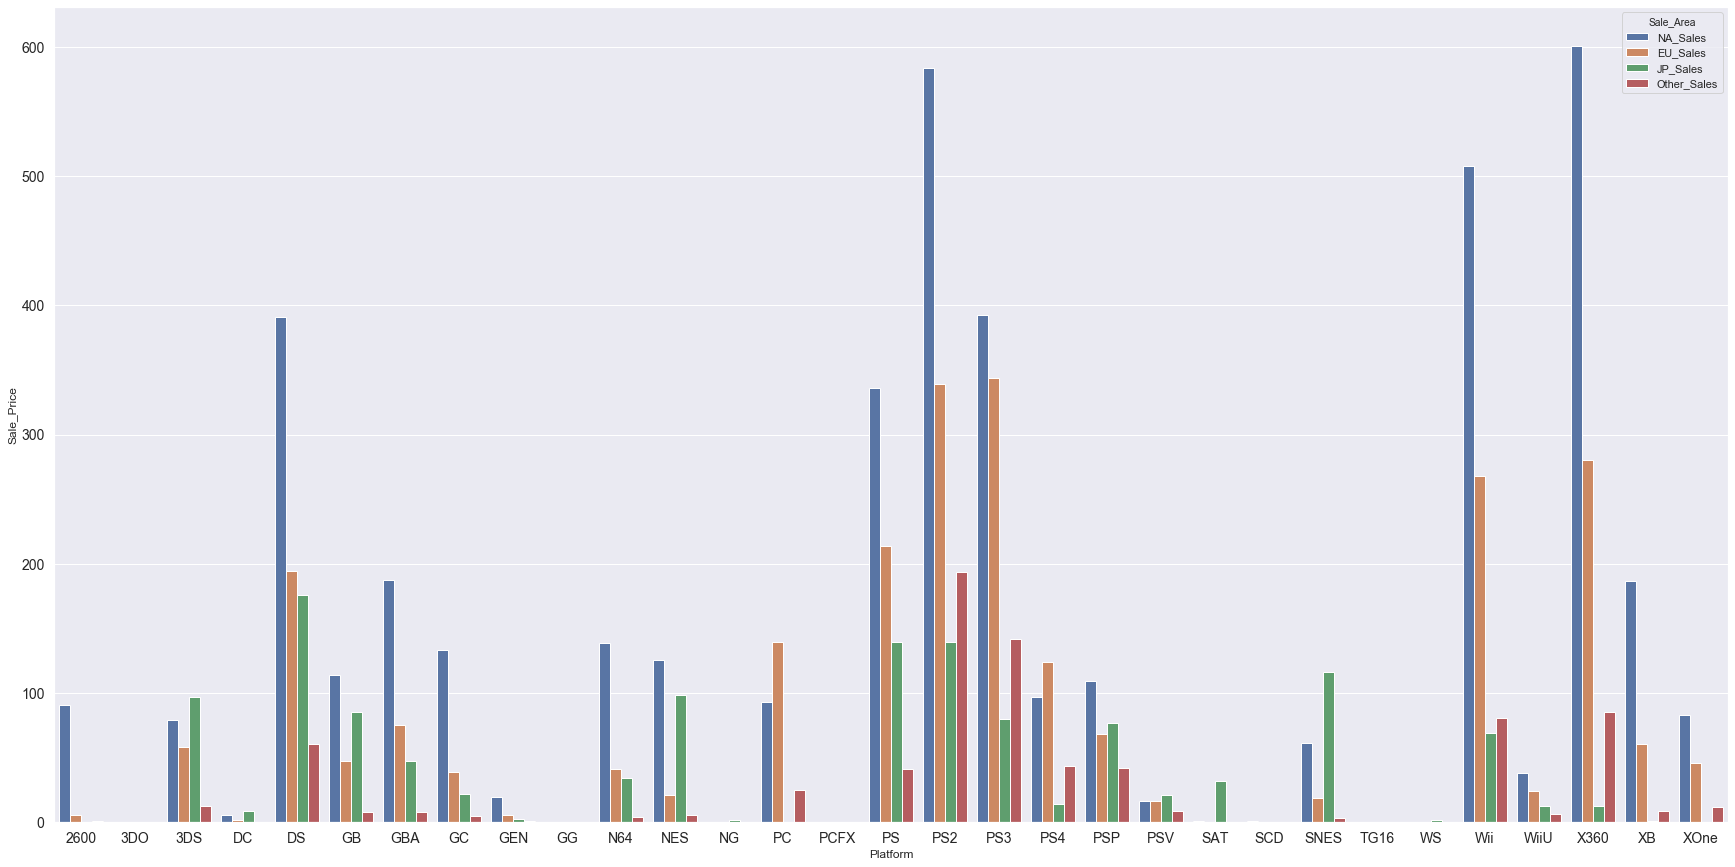

In [192]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 11. Top 20 Publisher

In [206]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Mystique                           1
Gaga                               1
Simon & Schuster Interactive       1
Detn8 Games                        1
Grand Prix Games                   1
Name: Publisher, Length: 578, dtype: int64

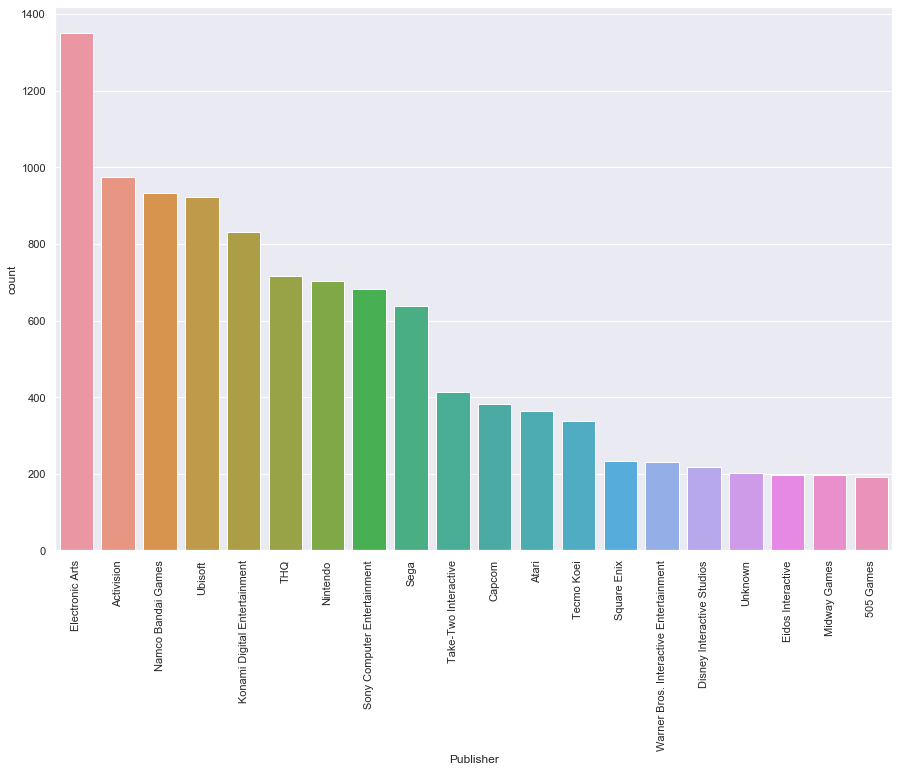

In [205]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Publisher', order= df['Publisher'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

# Number of Games Published Annually

In [209]:
AnnualNumberOfGames = df['Year'].groupby(df['Year']).count()

fig = px.line(AnnualNumberOfGames, x=AnnualNumberOfGames.index, y=AnnualNumberOfGames,
              labels={
                  "index": "Year",
                  "y": "Number of Games Published"
              }
              )
fig.update_layout(title_text='Number of Games Published Annually',
                  title_x=0.5, title_font=dict(size=24))

fig.show()

# Video Game Sales for each Market Annually

In [211]:
AnnualSalesMarket = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['NA_Sales'],
                         name="North America Sales",
                         hovertext=AnnualSalesMarket['NA_Sales']))

fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['EU_Sales'],
                         name="Europe Sales",
                         hovertext=AnnualSalesMarket['EU_Sales']))

fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['JP_Sales'],
                         name="Japan Sales",
                         hovertext=AnnualSalesMarket['JP_Sales']))

fig.add_trace(go.Scatter(x=AnnualSalesMarket['Year'], y=AnnualSalesMarket['Other_Sales'],
                         name="Other Sales",
                         hovertext=AnnualSalesMarket['Other_Sales']))

fig.update_layout(title_text='Video Game Sales for each Market Annually',
                  title_x=0.5, title_font=dict(size=22))  # Location and the font size of the main title
fig.update_layout(xaxis_title="Years",
    yaxis_title="Sales (M)")

fig.show()

# Total revenue by region

In [217]:
total_rev = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

total_rev = total_rev.sum().reset_index()
total_rev = total_rev.rename(columns={'index':'Region',0:'Sales'})

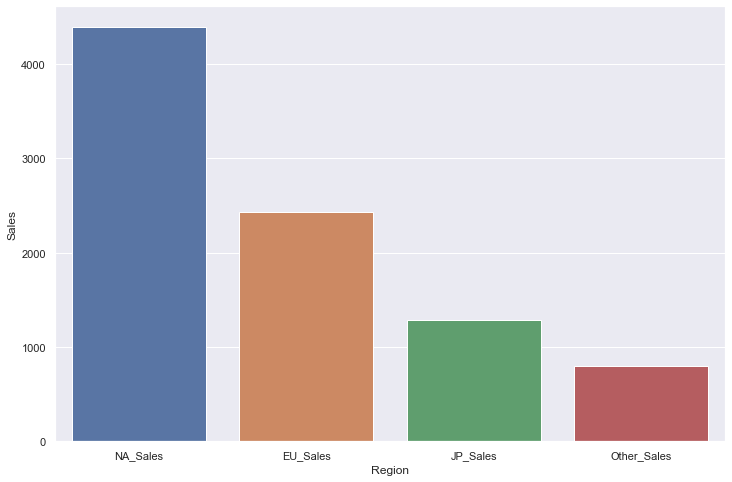

In [222]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Sales', data = total_rev)
plt.show()